## Schrodinger's Equation

In [23]:
import numpy
from scipy.linalg import solve
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [24]:
def generateMatrix(N, sigma):
    
    # Setup the diagonal
    d = numpy.diag(numpy.ones(N-2)*(1+2j/sigma))
       
    # Setup upper diagonal
    ud = numpy.diag(numpy.ones(N-3)*-1, 1)
    
    # Setup lower diagonal
    ld = numpy.diag(numpy.ones(N-3)*-1, -1)
    
    A = d + ud + ld
    
    return A                   

In [25]:
def genRHS(psi, sigma):
    
    x = psi[1:-1]*((2j/sigma)+1) + psi[:-2] + psi[2:]
    
    #Dirichlet boundary conditions
    x[0] += psi[0]
    x[-1] += psi[0]
    
    return x

In [40]:
def CrankNicolson(psi, A, nt, sigma):
    
    for t in range(nt):
        psin = psi.copy()
        x = genRHS(psin, sigma)
        
        psi_interior = solve(A, x)
        psi[1:-1] = psi_interior
        
    return psi

In [101]:
L = 1
nx = 21

h = 6.62607004e-34 #[m^2*kg/s]
hbar = h/(2*numpy.pi)
m = 6.6464764063e-27 #[kg] - mass of Helium ion
dx = L/(nx-1)


psii = numpy.zeros(nx, dtype = numpy.complex)
psii[0] = 1

sigma = 0.5
dt = sigma*(dx**2)*m/hbar
nt = 10

A = generateMatrix(nx, sigma)

print(dt)

78781.69610432451


In [102]:
print(A)

[[ 1.+4.j -1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
   0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
   0.+0.j]
 [-1.+0.j  1.+4.j -1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
   0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
   0.+0.j]
 [ 0.+0.j -1.+0.j  1.+4.j -1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
   0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
   0.+0.j]
 [ 0.+0.j  0.+0.j -1.+0.j  1.+4.j -1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
   0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
   0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j  1.+4.j -1.+0.j  0.+0.j  0.+0.j  0.+0.j
   0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
   0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j -1.+0.j  1.+4.j -1.+0.j  0.+0.j  0.+0.j
   0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
   0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j -1.+

In [103]:
psi = CrankNicolson(psii.copy(), A, nt, sigma)

In [104]:
x = numpy.linspace(0,L,nx)

#pyplot.plot(x, psi, color='#003366', ls='-', lw=3);

In [105]:
print(psi)

[ 1.00000000+0.j          0.10960598-1.05042239j -0.79679242-0.13775186j
  0.20605724+0.71590215j  1.10169886-0.43640978j -0.19337232-1.53361245j
 -1.53736352-0.30842116j -0.62802495+1.18155587j  0.66075056+0.75650277j
  0.46414791-0.29879663j -0.11330726-0.55169753j  0.07950534-0.15893489j
  0.30603336+0.45170703j -0.28298129+0.61074337j -0.75647896-0.16562401j
 -0.10020771-0.77312303j  0.54794803-0.2174064j   0.10306245+0.35915988j
 -0.39793900-0.06878749j  0.05489750-0.52538714j  0.00000000+0.j        ]


In [106]:
psi_conj = numpy.conj(psi)
probfunc = psi*psi_conj

#print(psi_conj)
#print()
print(probfunc)

[ 1.00000000+0.j  1.11540066+0.j  0.65385374+0.j  0.55497548+0.j
  1.40419387+0.j  2.38935999+0.j  2.45861019+0.j  1.79048961+0.j
  1.00888775+0.j  0.30471271+0.j  0.31720870+0.j  0.03158140+0.j
  0.29769565+0.j  0.45308588+0.j  0.59969173+0.j  0.60776080+0.j
  0.34751258+0.j  0.13961769+0.j  0.16308717+0.j  0.27904538+0.j
  0.00000000+0.j]


/home/gil/anaconda3/lib/python3.4/site-packages/numpy/core/numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


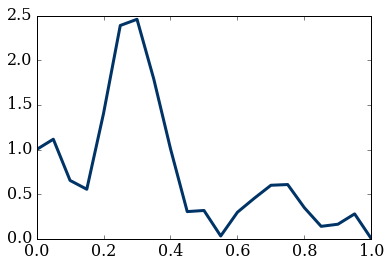

In [107]:
pyplot.plot(x, probfunc, color='#003366', ls='-', lw=3);